In [ ]:
# Kết nối tới drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the path to train and test dataset
train_path = "/content/drive/MyDrive/pollution_2000_2021.csv"
test_path = "/content/drive/MyDrive/pollution_2000_2021 - Test.csv"

1. Import Libraries

In [ ]:
# To process the string
import re

# To calculate in linear algebra
import numpy as np

# To manage data in dataframe
import pandas as pd

# To draw chart types
import seaborn as sns
import matplotlib.pyplot as plt

# To calculate statistical values
import scipy.stats as stats

# To convert string categorical variables to numbers
from sklearn.preprocessing import LabelEncoder

In [ ]:
import os

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the train dataset and view information
train_df = pd.read_csv(train_path)
train_df.info()

# The train dataset has 100000 rows with 28 columns (27 features and 1 label).
# It includes many missing data as well as many data types in the same attribute.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [ ]:
test_df = pd.read_csv(test_path)
test_df.head(20)

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58
5,2000-01-06,2000,1,6,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.014000,0.025,...,9,41.0,6.761905,17.0,7,24.0,39.950000,73.0,8,71
6,2000-01-07,2000,1,7,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.013235,0.024,...,23,40.0,8.666667,21.0,7,30.0,29.625000,43.0,9,41
7,2000-01-08,2000,1,8,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.011176,0.020,...,2,57.0,8.250000,18.0,0,26.0,29.666667,41.0,0,39
8,2000-01-09,2000,1,9,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.012588,0.022,...,2,32.0,6.500000,13.0,19,19.0,25.083333,37.0,20,35
9,2000-01-10,2000,1,10,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.010000,0.015,...,23,42.0,9.958333,21.0,20,30.0,37.666667,70.0,20,68


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [ ]:
def missing_data_table(df):
    """
    Create a DataFrame containing information about missing data in columns.

    Parameters:
    - df: DataFrame to be checked.

    Returns:
    DataFrame containing information about missing data.
    """

    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': df.isnull().sum(),
        'Percentage Missing': (df.isnull().sum() / len(df)) * 100
    })

    # Filter columns with missing data and sort by descending
    missing_data = missing_data[missing_data['Missing Values'] > 0]
    missing_data = missing_data.sort_values(
        by="Percentage Missing", ascending=False)
    missing_data.index = range(len(missing_data))  # Re-index

    return missing_data

In [ ]:
# Check for columns with missing data in the train dataframe
missing_data_table(train_df)

,Column,Missing Values,Percentage Missing


In [ ]:
test_df.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337258,0.476798,5.971042,5.377387,1.523358,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282958,0.446321,7.739380,5.142873,2.495094,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.187500,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.772727,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


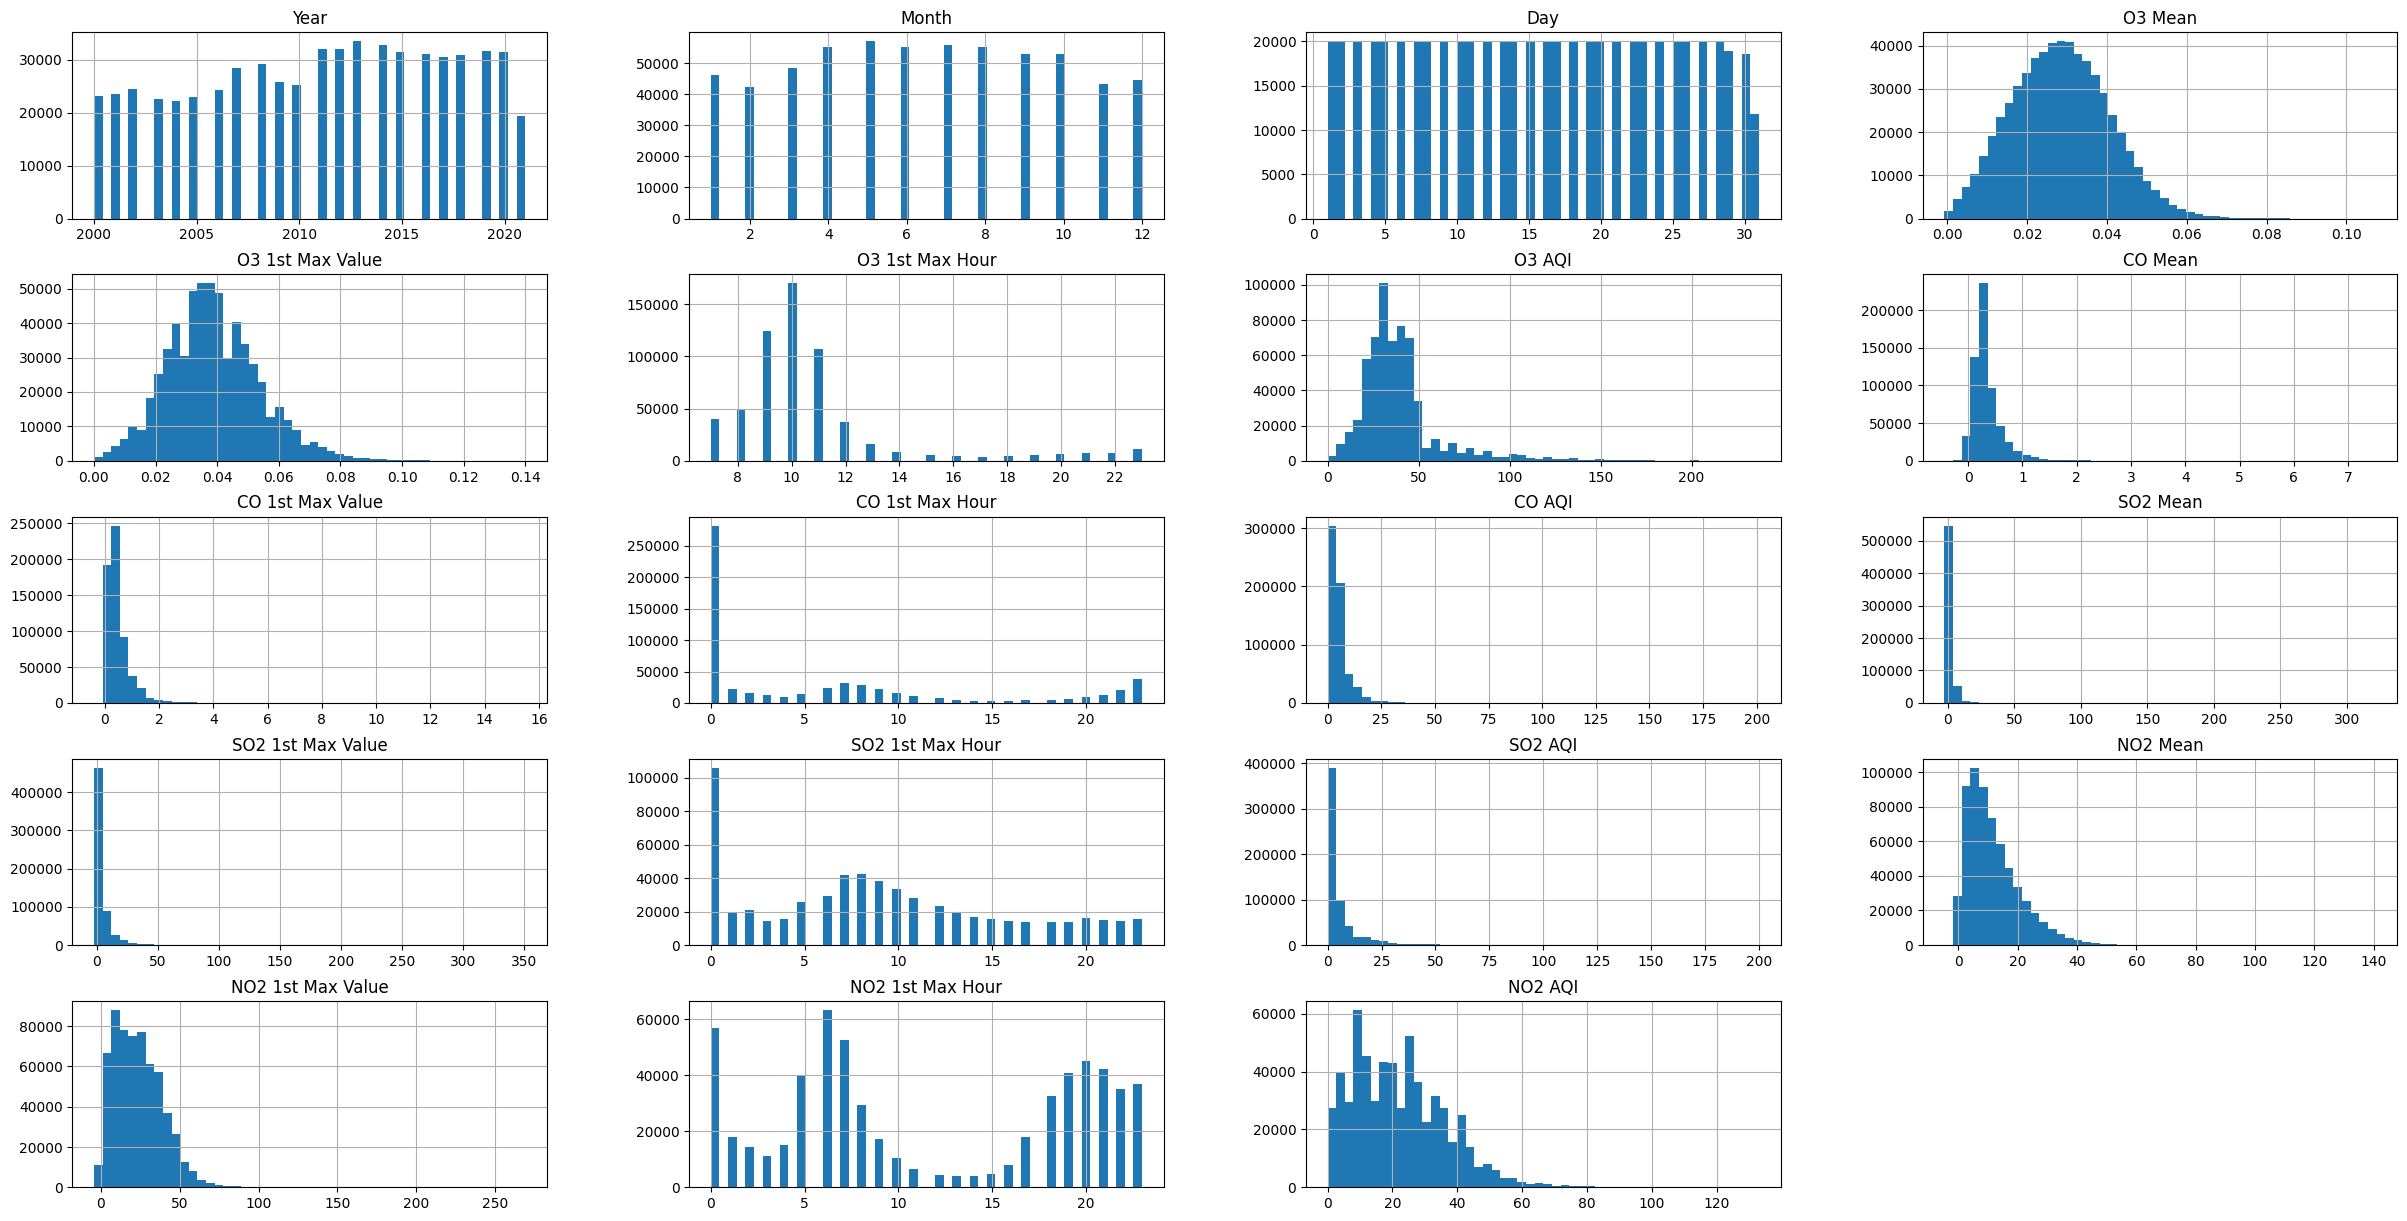

In [ ]:
# Check data distribution
test_df.hist(bins=50,figsize=(30, 15))
plt.show()

In [ ]:
# check NaN, Null data
missing_data = test_df.isna().sum().reset_index()
missing_data.columns = ["features", "total_missing"]

In [ ]:
missing_data

,features,total_missing
0,Date,0
1,Year,0
2,Month,0
3,Day,0
4,Address,0
5,State,0
6,County,0
7,City,0
8,O3 Mean,0
9,O3 1st Max Value,0


In [ ]:
# Standardized data.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']] = scaler.fit_transform(train_df[['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']])


 Loại bỏ Cột Không Cần Thiết:

In [ ]:
# Remove 'Address' and 'Country' columns
train_df = train_df.drop(['Address', 'County'], axis=1)

In [ ]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [ ]:
# Calculate the minimum and maximum value of column 'Date'
min_date = train_df['Date'].min()
max_date = train_df['Date'].max()

print(f"Min Date: {min_date}")
print(f"Max Date: {max_date}")

Min Date: 2000-01-01 00:00:00
Max Date: 2021-10-31 00:00:00


In [ ]:
# Count the number of states and cities in Pandas DataFrame
num_states = train_df['State'].nunique()
num_cities = train_df['City'].nunique()

print(f"Number of States: {num_states}")
print(f"Number of Cities: {num_cities}")

Number of States: 48
Number of Cities: 148


In [ ]:
state_counts = train_df['State'].value_counts()

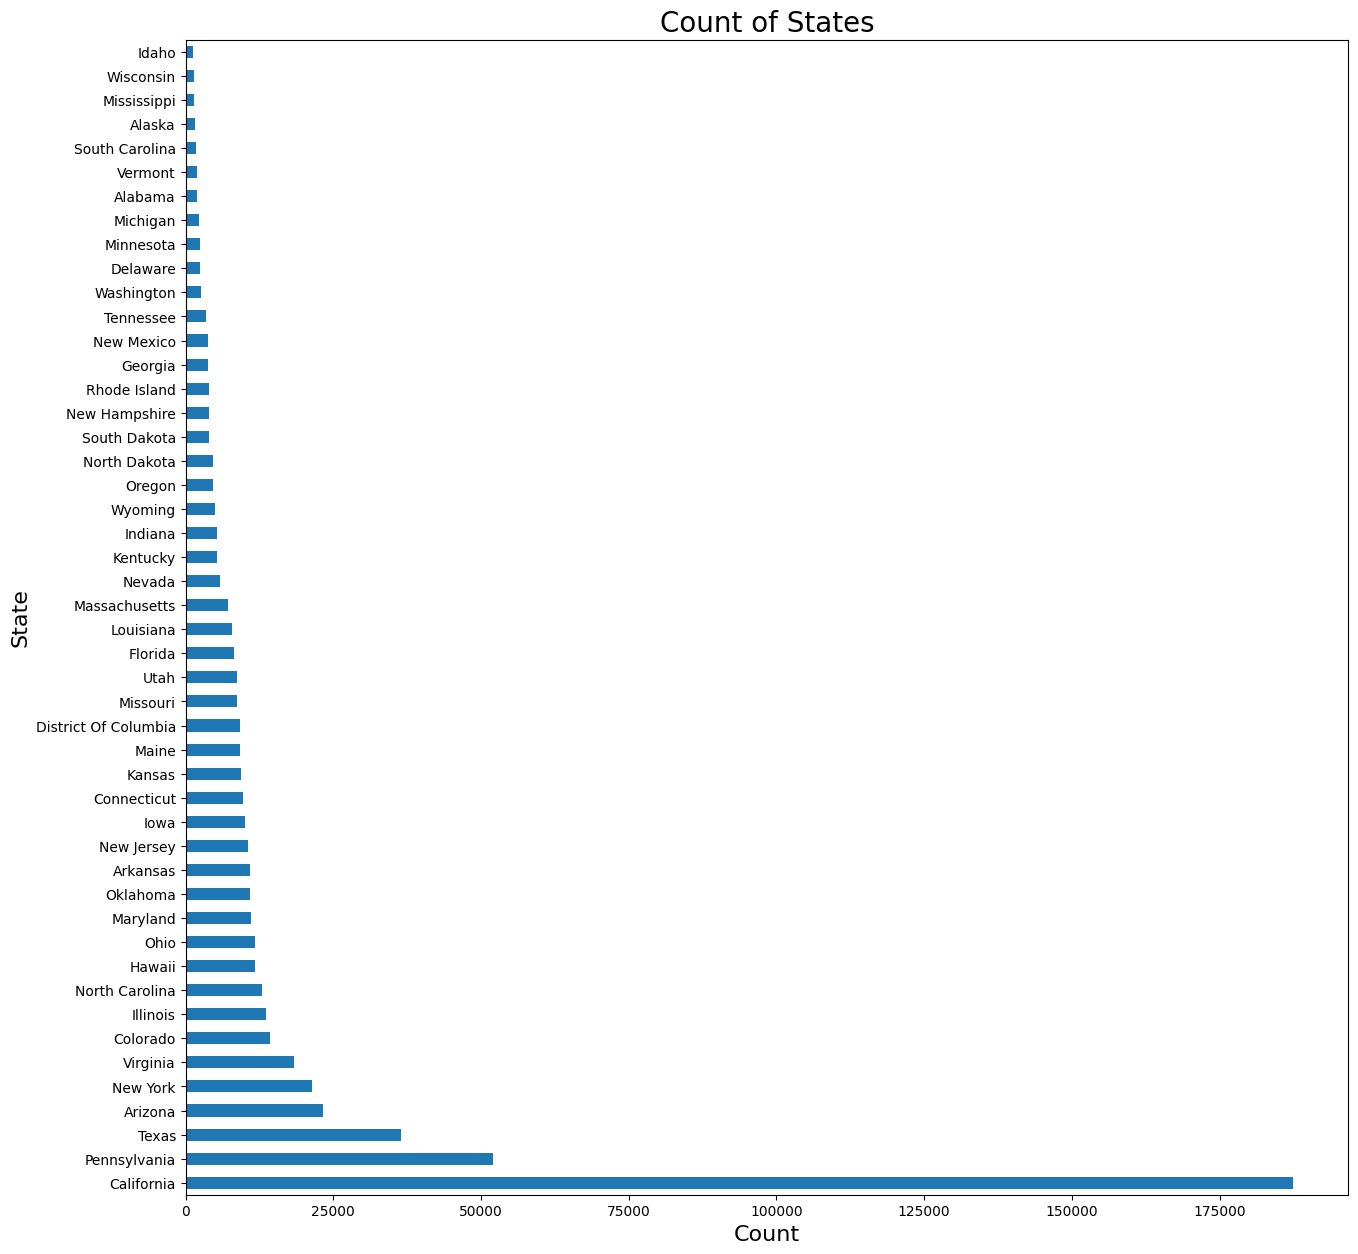

In [ ]:
# Draw chart
ax = state_counts.plot(kind='barh', y="Tên_Cột", figsize=(15, 15))

ax.set_ylabel("State", fontsize=16)
ax.set_xlabel("Count", fontsize=16)
ax.set_title('Count of States', fontsize=20)

# Show chart
plt.show()

In [ ]:
# Tạo biến tổng hợp 'Average_AQI' từ các chỉ số AQI
train_df['Average_AQI'] = train_df[['O3 AQI', 'CO AQI', 'SO2 AQI', 'NO2 AQI']].mean(axis=1)

In [ ]:
# Lấy ra những cột dạng numeric trong data
numeric = test_df.select_dtypes(exclude='object')

In [ ]:
# Lấy ra những cột cần thiết
cols_to_check = [col for col in numeric.columns if col not in ['Date']]
cols_to_check

['Year',
 'Month',
 'Day',
 'O3 Mean',
 'O3 1st Max Value',
 'O3 1st Max Hour',
 'O3 AQI',
 'CO Mean',
 'CO 1st Max Value',
 'CO 1st Max Hour',
 'CO AQI',
 'SO2 Mean',
 'SO2 1st Max Value',
 'SO2 1st Max Hour',
 'SO2 AQI',
 'NO2 Mean',
 'NO2 1st Max Value',
 'NO2 1st Max Hour',
 'NO2 AQI']

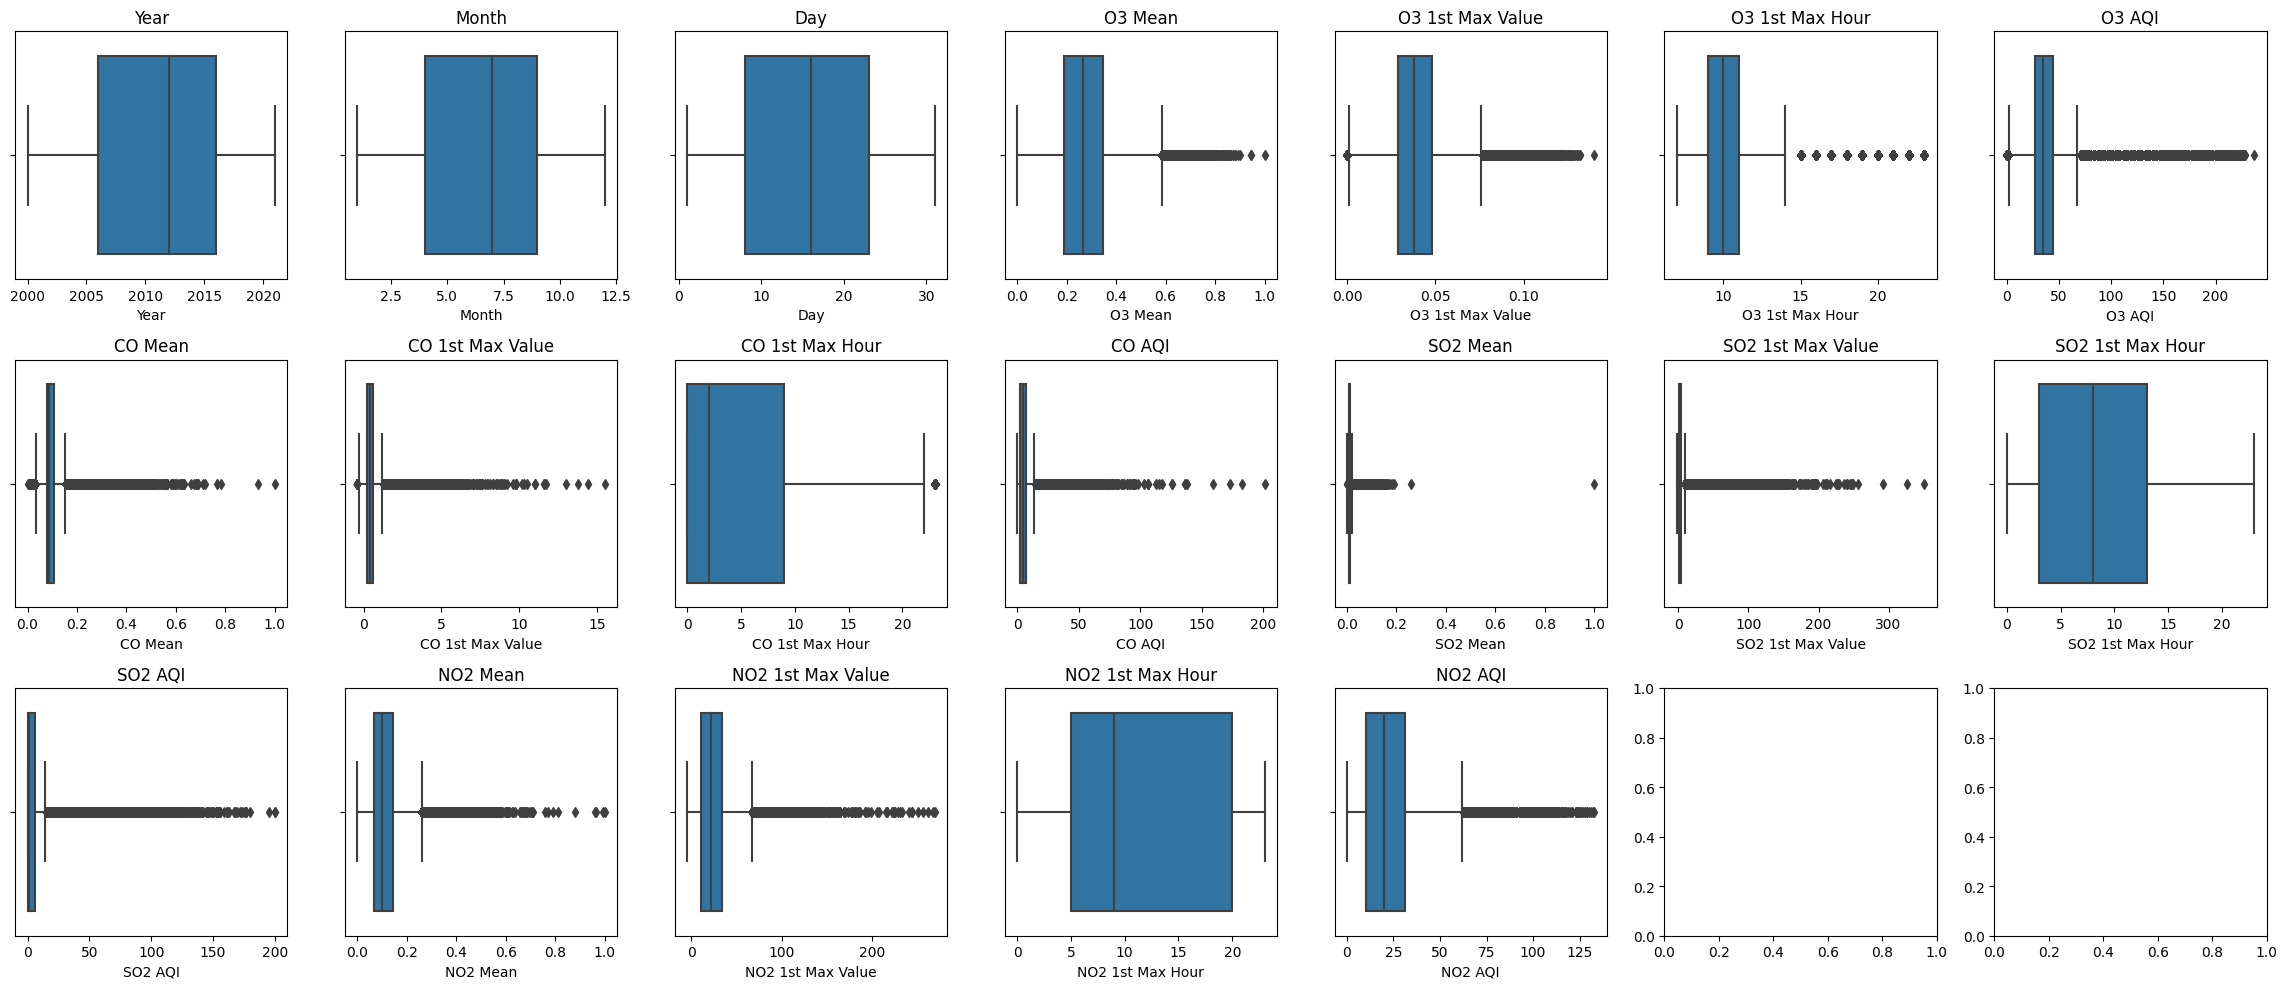

In [ ]:
# visualize outliers sử dụng boxplot
fig, ax = plt.subplots(3, 7, figsize=(23, 10))  # Điều chỉnh kích thước subplot để vừa với số lượng biến
ax = ax.flatten()

for i, c in enumerate(cols_to_check):
    sns.boxplot(x=train_df[c], ax=ax[i])
    ax[i].set_title(c)  # Thêm tiêu đề cho mỗi boxplot

fig.tight_layout()
plt.show()

Kết luận
Dữ liệu bao gồm:

Tên của các features: Dễ hiểu, không cần thực hiện thay đổi

Dữ liệu của các features: Cần thực hiện thay đổi

Geography cần thực hiện encode sang dạng numerical
Gender cần thực hiện encode sang dạng numerical
Ta phân loại được:

Categorical features:
Numerical features:
Nominal features:
Label:
NaN data: Các features không chứa NaN data

Ouliers:


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Tiêu chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện mô hình XGBoost
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá hiệu suất
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Dự đoán chất lượng không khí cho tương lai
future_data_scaled = scaler.transform(future_data)
future_air_quality = model.predict(future_data_scaled)